# Imports de llibreries

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

# Càrrega del dataset

In [276]:
df_proposals = pd.read_csv("../data/raw/propostes-assemblea-clima-decidim-barcelona.csv")

# Exploratory Data Analysis

## Anàlisi de les dades raw

In [277]:
print(df_proposals.columns)
print(f"Nombre de columnes: {len(df_proposals.columns)}")
print(f"Dimensió del dataset: {df_proposals.shape}")

Index(['id', 'category/id', 'category/name/ca', 'category/name/es', 'scope/id',
       'scope/name/ca', 'scope/name/es', 'participatory_space/id',
       'participatory_space/url', 'component/id', 'title/ca', 'body/ca',
       'address', 'latitude', 'longitude', 'state', 'reference', 'answer/ca',
       'answer/es', 'supports', 'endorsements/total_count',
       'endorsements/user_endorsements', 'comments', 'attachments',
       'followers', 'published_at', 'url', 'meeting_urls', 'related_proposals',
       'is_amend', 'original_proposal/title', 'original_proposal/url',
       'category/name/en', 'title/es', 'body/es', 'original_proposal/title/ca',
       'original_proposal/title/es'],
      dtype='object')
Nombre de columnes: 37
Dimensió del dataset: (34, 37)


En aquest cas observem com al dataset de l'Assemblea Ciutadana Pel Clima de Barcelona de l'Ajuntament de Barcelona només existeixen 37 columnes, unes quantes menys que les 45 que existien al dataset de l'Assemblea Ciutadana pel Clima de Catalunya de la Generalitat de Catalunya. En aquest cas no hem de fer cap filtratge perquè les propostes del dataset corresponen totes a l'assemblea.

In [278]:
df_proposals.head(5)

,id,category/id,category/name/ca,category/name/es,scope/id,scope/name/ca,scope/name/es,participatory_space/id,participatory_space/url,component/id,...,meeting_urls,related_proposals,is_amend,original_proposal/title,original_proposal/url,category/name/en,title/es,body/es,original_proposal/title/ca,original_proposal/title/es
0,38115,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,NaN,NaN,False,NaN,NaN,NaN,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...,NaN,NaN
1,38116,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,NaN,NaN,False,NaN,NaN,NaN,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...,NaN,NaN
2,38117,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,NaN,NaN,False,NaN,NaN,NaN,Difundir las Comunidades Energéticas a través ...,Descripción:\nDar a conocer las comunidades en...,NaN,NaN
3,38118,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,NaN,NaN,False,NaN,NaN,NaN,Crear la normativa necesaria para impulsar las...,Descripción:\nCrear la normativa necesaria par...,NaN,NaN
4,38119,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,NaN,NaN,False,NaN,NaN,NaN,Generar cultura y sensiblización en torno a la...,Descripción:\nConstruir estructuras emblemátic...,NaN,NaN


Observem a primera vista que hi han unes quantes columnes amb valors NaN, així que procedim a investigar quines només contenen nans per eliminar-les.

In [279]:
print(df_proposals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34 non-null     int64  
 1   category/id                     34 non-null     int64  
 2   category/name/ca                34 non-null     object 
 3   category/name/es                34 non-null     object 
 4   scope/id                        34 non-null     int64  
 5   scope/name/ca                   34 non-null     object 
 6   scope/name/es                   34 non-null     object 
 7   participatory_space/id          34 non-null     int64  
 8   participatory_space/url         34 non-null     object 
 9   component/id                    34 non-null     int64  
 10  title/ca                        34 non-null     object 
 11  body/ca                         34 non-null     object 
 12  address                         0 non-

Així doncs veiem que les columnes o tenen tots els valors no nuls o tenen tots els valors nuls, per tant procedim a l'eliminació de les columnes amb valors nuls.

In [280]:
df_proposals = df_proposals.dropna(axis=1)
print(df_proposals.columns)
print(f"Nombre de columnes: {len(df_proposals.columns)}")
df_proposals.head(5)

Index(['id', 'category/id', 'category/name/ca', 'category/name/es', 'scope/id',
       'scope/name/ca', 'scope/name/es', 'participatory_space/id',
       'participatory_space/url', 'component/id', 'title/ca', 'body/ca',
       'state', 'reference', 'answer/ca', 'answer/es', 'supports',
       'endorsements/total_count', 'comments', 'attachments', 'followers',
       'published_at', 'url', 'is_amend', 'title/es', 'body/es'],
      dtype='object')
Nombre de columnes: 26


,id,category/id,category/name/ca,category/name/es,scope/id,scope/name/ca,scope/name/es,participatory_space/id,participatory_space/url,component/id,...,supports,endorsements/total_count,comments,attachments,followers,published_at,url,is_amend,title/es,body/es
0,38115,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:14:25 UTC,https://www.decidim.barcelona/processes/Assemb...,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...
1,38116,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:30:49 UTC,https://www.decidim.barcelona/processes/Assemb...,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...
2,38117,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:49:38 UTC,https://www.decidim.barcelona/processes/Assemb...,False,Difundir las Comunidades Energéticas a través ...,Descripción:\nDar a conocer las comunidades en...
3,38118,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:54:45 UTC,https://www.decidim.barcelona/processes/Assemb...,False,Crear la normativa necesaria para impulsar las...,Descripción:\nCrear la normativa necesaria par...
4,38119,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 12:03:27 UTC,https://www.decidim.barcelona/processes/Assemb...,False,Generar cultura y sensiblización en torno a la...,Descripción:\nConstruir estructuras emblemátic...


Hem passat de tenir 37 columnes a tenir-ne 26, per tant hem eliminat 11 columnes amb valors nuls.

## Anàlisi dels atributs

### Id

In [281]:
print(type(df_proposals['id'][0]))
print(len(df_proposals['id']) == df_proposals['id'].nunique())

<class 'numpy.int64'>
True


La columna `id` representa número enter identificador únic de cada proposta dins el sistema de Decidim. En aquest cas, tal i com es suposava, hi ha tantes id diferents com files conté el dataset.

### Category/id

In [282]:
print(type(df_proposals['category/id'][0]))
print(df_proposals['category/id'].nunique())
print(df_proposals['category/id'].unique())

<class 'numpy.int64'>
3
[1460 1461 1462]


La columna `category/id` representa un número enter identificador únic de cada la categoria a la que correspon la proposta dins el sistema de Decidim. S'observa que només hi ha tres tipus de categories diferents entre totes les propostes del dataset. En aquest cas, el nombre de id de les categories hauria de coincidir amb la seguent columna, que és el nom que les identifica.

### Category/name/ca

In [283]:
print(type(df_proposals['category/name/ca'][0]))
print(df_proposals['category/name/ca'].unique())
print(df_proposals['category/name/ca'].nunique())

<class 'str'>
['Energia' 'Mobilitat i Infraestructures' 'Consum i Residus']
3


La columna `category/name/ca` conté una cadena de text que representa el nom en català de la categoria a la que pertany la proposta. En aquest cas, tal i com s'ha vist amb l'anàlisi de les id de les columnes, n'hi ha només 3 de diferents en tot el dataset, que són 'Energia', 'Mobilitat i Infraestructures' i 'Consum i Residus'. Seria interessant veure el nombre de propostes que té cada categoria.

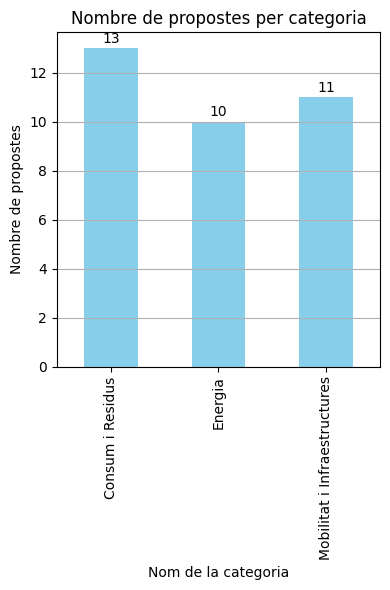

In [284]:
valors = df_proposals['category/name/ca'].value_counts().sort_index()

plt.figure(figsize=(4, 6))
valors.plot(kind='bar', color='skyblue')
plt.xlabel("Nom de la categoria")
plt.ylabel("Nombre de propostes")
plt.title("Nombre de propostes per categoria")

for i, v in enumerate(valors):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observem que més o menys les propostes estan ben repartides entre les tres categories, essent 'Consum i Residus' la que més en té amb 13, després 'Mobilitat i Infraestructures' amb 11 i finalment 'Energia' amb 10.

### Category/name/es

In [285]:
print(type(df_proposals['category/name/es'][0]))
print(df_proposals['category/name/es'].unique())
print(df_proposals['category/name/es'].nunique())

<class 'str'>
['Energía' 'Movilidad e Infraestructuras' 'Consumo y Residuos']
3


La columna `category/name/es` conté una cadena de text que representa el nom en castellà de la categoria a la que pertany la proposta. En aquest cas, s'observa que conté exactament els mateixos valors que a la columna anterior però traduits al castellà.

### Scope/id

In [286]:
print(type(df_proposals['scope/id'][0]))
print(df_proposals['scope/id'].unique())
print(df_proposals['scope/id'].nunique())

<class 'numpy.int64'>
[11]
1


La columna `scope/id` conté valors numèrics enters que representen l'identificador únic de l'àmbit de la proposta al sistema de Decidim. En aquest cas, veiem que totes les propostes pertanyen al mateix "scope" ja que només existeix un valor, el número 11.

### Scope/name/ca

In [287]:
print(type(df_proposals['scope/name/ca'][0]))
print(df_proposals['scope/name/ca'].unique())
print(df_proposals['scope/name/ca'].nunique())

<class 'str'>
['Ciutat']
1


La columna `scope/name/ca` conté cadenes de text que representen el nom de l'àmbit al que pertany cada proposta dins el sistema de Decidim en català. En aquest cas, veiem que totes les propostes pertanyen al mateix àmbit, el de 'Ciutat', ja que són propostes enfocades a la ciutat de Barcelona i no pas a un àmbit més general com podria ser tota Catalunya.

### Scope/name/es

In [288]:
print(type(df_proposals['scope/name/es'][0]))
print(df_proposals['scope/name/es'].unique())
print(df_proposals['scope/name/es'].nunique())

<class 'str'>
['Ciutat']
1


La columna `scope/name/ca` conté cadenes de text que representen el nom de l'àmbit al que pertany cada proposta dins el sistema de Decidim en castellà, suposadament. En aquest cas, veiem que com amb la columna anterior, totes pertanyen al mateix àmbit 'Ciutat'. Salta a la vista que teòricament hauria d'estar el nom traduït al castellà, però està en català, exactament igual que a la columna anterior.

### Participatory_space/id

In [289]:
print(type(df_proposals['participatory_space/id'][0]))
print(df_proposals['participatory_space/id'].unique())
print(df_proposals['participatory_space/id'].nunique())

<class 'numpy.int64'>
[204]
1


La columna `participatory_space/id` conté valors numèrics enters que representen l'identificador únic de l'espai participatori de Decidim al que pertanyen les propostes, en aquest cas la id que identifica l'Asssemblea pel Clima de Barcelona. S'observa que tal i com hauria de ser, totes les propostes del dataset pertanyen al mateix espai participatori.

### Participatory_space/url

In [290]:
print(type(df_proposals['participatory_space/url'][0]))
print(df_proposals['participatory_space/url'].unique())
print(df_proposals['participatory_space/url'].nunique())

<class 'str'>
['https://www.decidim.barcelona/processes/AssembleaClima?participatory_process_slug=AssembleaClima']
1


La columna `participatory_space/url` conté cadenes de text que representen la URL corresponent a l'espai participatori de Decidim al que pertanyen les propostes. En aquest cas s'observa que com amb la columna anterior, totes les propostes tenen la mateixa URL de l'espai al que pertanyen, l'Assemblea pel Clima de Barcelona.

### Component/id

In [291]:
print(type(df_proposals['component/id'][0]))
print(df_proposals['component/id'].unique())
print(df_proposals['component/id'].nunique())

<class 'numpy.int64'>
[5536]
1


La columna `component/id` conté valors numèrics enters que representen l'identificador únic del component que són dins del sistema de Decidim. En aquest cas totes les propostes tenen el mateix identificador, que representa el component Proposal dins de l'espai participatiu de l'Assemblea.

### Title/ca

In [292]:
print(type(df_proposals['title/ca'][0]))
print(df_proposals['title/ca'].nunique())
print(len(df_proposals) == df_proposals['title/ca'].nunique())
print(df_proposals['title/ca'].head(5))

<class 'str'>
34
True
0           Reduir el consum energètic de l'Ajuntament
1     Facilitar els tràmits de la transició energètica
2    Difondre les Comunitats Energètiques a través ...
3    Crear la normativa necessària per impulsar les...
4    Generar cultura i sensibilització entorn de la...
Name: title/ca, dtype: object


La columna `title/ca` conté cadenes de text que representen els títols de cada proposta. En aquest cas s'observa que cada proposta té un títol diferent i dóna a entendre que no existeix cap proposta repetida.

### Body/ca

In [293]:
print(type(df_proposals['body/ca'][0]))
print(df_proposals['body/ca'].nunique())
print(len(df_proposals) == df_proposals['body/ca'].nunique())
print(df_proposals['body/ca'][0])
print("\n")
print(df_proposals['body/ca'][1])

<class 'str'>
34
True
Descripció:
Executar una bateria de mesures que situïn l’Ajuntament com un
exemple per seguir en reducció del consum energètic. Els canvis
passen per la reducció del consum en equipaments públics com les
escoles, la sensibilització a treballadors/es i usuaris/àries, la
generació d’energia en edifi cis i espais públics i les millores
d’eficiència.

Justificació:
L'Ajuntament té marge per actuar en els edifi cis i espais
públics que gestiona. També és un referent per a la ciutadania i
les seves decisions tenen més visibilitat. Per tot això, les
millores en el funcionament de la institució tenen un impacte
positiu com a motor de canvi. A més, les millores tecnològiques
permeten reduir el consum sense perdre qualitat de vida.

Accions:

* Repensar la il·luminació de la ciutat per fer-la més eficient.
Canviar bombetes, revisar que la vegetació no creï espais foscos
i deixar d’il·luminar espais que no siguin necessaris. Tancar els
llums dels equipaments a les nits.
* Fo

La columna `body/ca` conté cadenes de text que representen el contingut de cada proposta. En aquest cas, tal com s'ha vist amb els títols, també s'observa que existeix un contingut diferent per a cada proposta. Visualitzant les propostes, s'observa que segueixen un patró, on cada contingut de la proposta està estructurat en Descripció, Justificació i Accions. Potser seria interessant de cara a més endavant treballar amb cada apartat per separat en columnes diferents.

### State

In [294]:
print(type(df_proposals['state'][0]))
print(df_proposals['state'].nunique())
print(df_proposals['state'].unique())

<class 'str'>
3
['accepted' 'rejected' 'evaluating']


La columna `state` conté cadenes de text que representen l'estat en què es troba cada proposta. Existeixen tres tipus d'estat diferents que són 'accepted' si la proposta ha estat acceptada, 'rejected' si la proposta ha estat rebutjada i 'evaluating' si la proposta encara està sent avaluada i no s'ha pres cap decisió.

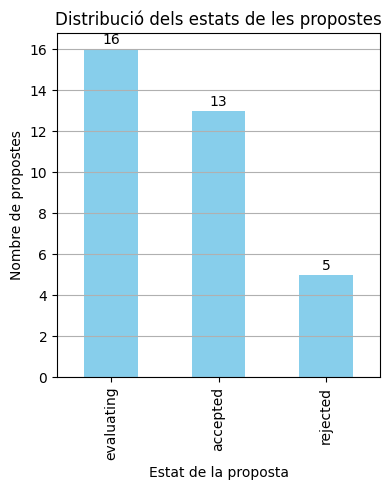

In [295]:
valors = df_proposals['state'].value_counts()

plt.figure(figsize=(4, 5))
valors.plot(kind='bar', color='skyblue')
plt.xlabel("Estat de la proposta")
plt.ylabel("Nombre de propostes")
plt.title("Distribució dels estats de les propostes")

for i, v in enumerate(valors):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Observant la distribució de les propostes, es veu com gairebé la meitat estan en procés de ser avaluades encara, 13/34 han estat acceptades i només 5 propostes han estat rebutjades.

### Reference

In [296]:
print(type(df_proposals['reference'][0]))
print(df_proposals['reference'].nunique())
print(df_proposals['reference'].unique())

<class 'str'>
34
['BCN-PROP-2023-02-38115' 'BCN-PROP-2023-02-38116'
 'BCN-PROP-2023-02-38117' 'BCN-PROP-2023-02-38118'
 'BCN-PROP-2023-02-38119' 'BCN-PROP-2023-02-38120'
 'BCN-PROP-2023-02-38121' 'BCN-PROP-2023-02-38122'
 'BCN-PROP-2023-02-38123' 'BCN-PROP-2023-02-38124'
 'BCN-PROP-2023-02-38125' 'BCN-PROP-2023-02-38127'
 'BCN-PROP-2023-02-38128' 'BCN-PROP-2023-02-38129'
 'BCN-PROP-2023-02-38130' 'BCN-PROP-2023-02-38131'
 'BCN-PROP-2023-02-38132' 'BCN-PROP-2023-02-38133'
 'BCN-PROP-2023-02-38134' 'BCN-PROP-2023-02-38135'
 'BCN-PROP-2023-02-38136' 'BCN-PROP-2023-02-38137'
 'BCN-PROP-2023-02-38138' 'BCN-PROP-2023-02-38139'
 'BCN-PROP-2023-02-38140' 'BCN-PROP-2023-02-38141'
 'BCN-PROP-2023-02-38142' 'BCN-PROP-2023-02-38143'
 'BCN-PROP-2023-02-38144' 'BCN-PROP-2023-02-38145'
 'BCN-PROP-2023-02-38146' 'BCN-PROP-2023-02-38147'
 'BCN-PROP-2023-02-38148' 'BCN-PROP-2023-02-38149']


La columna `reference` conté cadenes de text que representen la referència única de cada proposta per tal de facilitar-ne la seva cerca. En aquest cas s'observa com, evidentment, hi ha tantes referències com propostes conté el dataset.

### Answer/ca

In [297]:
print(type(df_proposals['answer/ca'][0]))
print(df_proposals['answer/ca'].nunique())
print(df_proposals['answer/ca'][0])

<class 'str'>
34
<p>Aquesta proposta és viable i està alineada amb accions de plans municipals actualment en vigor. </p><p>La seva implementació té una dificultat mitjana ja que, tot i que és relativament fàcil identificar i planificar les accions que cal portar a terme, algunes de les quals ja s’estan implementant, l’Ajuntament disposa de més d’un miler d’edificis i més de 10.000 treballadors, cosa que li afegeix dificultat a l’hora de gestionar-ho, també amb tots els referents dels districtes i àrees involucrades. </p><p>L’impacte de la mesura és alt, perquè la implementació d’aquesta proposta comporta estalvis directes en el consum d’energia així com una reducció de les emissions. Així mateix, es tracta d’una mesura exemplificadora que pot tenir efectes multiplicadors.</p><p>Per tant, es proposa portar-la a terme en un termini curt de temps i amb una prioritat alta.  </p>


La columna `answer/ca` conté cadenes de text que representen la resposta de l'organització a la proposta en català, és a dir el motiu pel qual s'ha acceptat, acceptat amb consideracions o rebutjat. S'observa que hi ha una resposta diferent per cada proposta, per tant també sembla que no existeixen duplicats. Cal destacar que el text està en format HTML i és possible que es necessiti treure'n els tags HTML posteriorment.

### Answer/es

In [298]:
print(type(df_proposals['answer/es'][0]))
print(df_proposals['answer/es'].nunique())
print(df_proposals['answer/es'][0])

<class 'str'>
34
<p>Esta propuesta es viable y está alineada con acciones de planes municipales actualmente en vigor. </p><p>Su implementación presenta una dificultad media ya que, aunque es relativamente fácil identificar y planificar las acciones que se deben llevar a cabo, algunas de las cuales ya se están implementando, el Ayuntamiento dispone de más de 1.000 edificios y más de 10.000 trabajadores/as, lo que le añade dificultad a la hora de gestionarlo, también con todos los referentes de los distritos y áreas involucradas. </p><p>El impacto de la medida es alto, porque la implementación de esta propuesta conlleva ahorros directos en el consumo de energía, así como una reducción de las emisiones. Asimismo, se trata de una medida ejemplificadora que puede tener efectos multiplicativos.</p><p>Por lo tanto, se propone llevarla a cabo en un plazo corto de tiempo y con una prioridad alta.  </p>


La columna `answer/es` conté cadenes de text que representen la resposta de l'organització a la proposta en castellà, i té les mateixes característiques que la columna anterior. És el mateix text però localitzat i traduit al castellà.

### Supports

In [299]:
print(type(df_proposals['supports'][0]))
print(df_proposals['supports'].nunique())
print(df_proposals['supports'].unique())

<class 'numpy.int64'>
1
[0]


La columna `supports` conté un valor numèric enter que suposem representa el nombre de suports que ha rebut la proposta. A la documentació de Decidim no existeix cap apartat que parli sobre aquesta columna i tots els valors són 0, igual que a les dades de l'Assemblea Ciutadana pel Clima de Catalunya.

### Endorsements/total_count

In [300]:
print(type(df_proposals['endorsements/total_count'][0]))
print(df_proposals['endorsements/total_count'].nunique())
print(df_proposals['endorsements/total_count'].unique())

<class 'numpy.int64'>
1
[0]


La columna `endorsements/total_count` conté valors numèrics enters que representen el nombre de suports que té cada proposta. En aquest cas s'observa que cap proposta té cap endorsement, ja que totes en tenen 0. Això és estrany, comparat amb les dades de l'Assemblea Ciutadana pel Clima de Catalunya, on sí que hi havia propostes amb diferents valors d'endorsements. Podria ser degut al fet que a la pàgina web de l'Assemblea de l'ajuntament de Barcelona no apareix la opció per donar suport a una proposta (totes les propostes són del mateix autor, un autor oficial de l'espai participatori i potser han desactivat la funció).

### Comments

In [301]:
print(type(df_proposals['comments'][0]))
print(df_proposals['comments'].nunique())
print(df_proposals['comments'].unique())

<class 'numpy.int64'>
3
[0 2 1]


La columna `comments` conté valors numèrics enters que representen el nombre de comentaris que té cada proposta. Observem que només existeixen tres valors diferents, on el mínim nombre de comentaris que té alguna proposta és de 0 i el màxim de 2, amb algunes que només en tenen 1. Seria interessant conèixer la distribució dels valors dels comentaris per veure si hi ha gaires propostes amb comentaris o no.

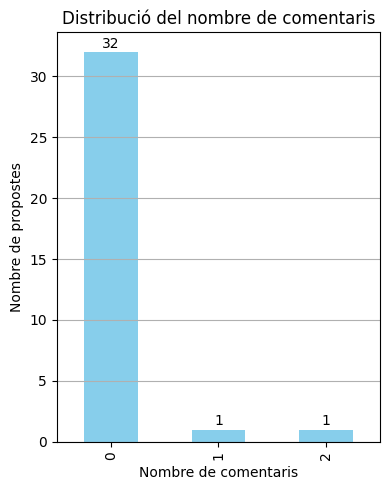

In [302]:
valors = df_proposals['comments'].value_counts().sort_index()

plt.figure(figsize=(4, 5))
valors.plot(kind='bar', color='skyblue')
plt.xlabel("Nombre de comentaris")
plt.ylabel("Nombre de propostes")
plt.title("Distribució del nombre de comentaris")

for i, v in enumerate(valors):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

En aquest cas, veient la distribució, s'observa clarament que l'àmplia majoria de les propostes no han rebut cap comentari (32/34) i que només una proposta n'ha rebut 2 i una altra proposta n'ha rebut 1.

### Attachments

In [303]:
print(type(df_proposals['attachments'][0]))
print(df_proposals['attachments'].nunique())
print(df_proposals['attachments'].unique())

<class 'numpy.int64'>
2
[0 1]


La columna `attachments` conté valors numèrics enters que representen el nombre de fitxers adjunts que conté una proposta. En aquest cas s'observa que hi ha propostes que no en contenen cap i alguna proposta que en conté només un. Seria interessant veure'n la distribució per veure quantes propostes tenen fitxer adjunt i quantes no.

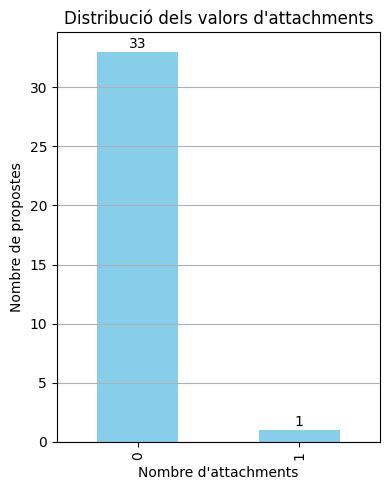

In [304]:
valors = df_proposals['attachments'].value_counts().sort_index()

plt.figure(figsize=(4, 5))
valors.plot(kind='bar', color='skyblue')
plt.xlabel("Nombre d'attachments")
plt.ylabel("Nombre de propostes")
plt.title("Distribució dels valors d'attachments")

for i, v in enumerate(valors):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

En aquest cas, s'observa que només 1 de les 34 propostes que conté el dataset té un attachment, i que la resta no en conté cap.

### Followers

In [305]:
print(type(df_proposals['followers'][0]))
print(df_proposals['followers'].nunique())
print(df_proposals['followers'].unique())

<class 'numpy.int64'>
2
[0 1]


La columna `followers` conté valors numèrics enters que representen el nombre de seguidors interessats que té cada proposta. En aquest cas, existeixen propostes amb 0 seguidors o amb 1 sol seguidor. Seria interessant veure'n la distribució de valors per veure quantes n'hi ha de cada.

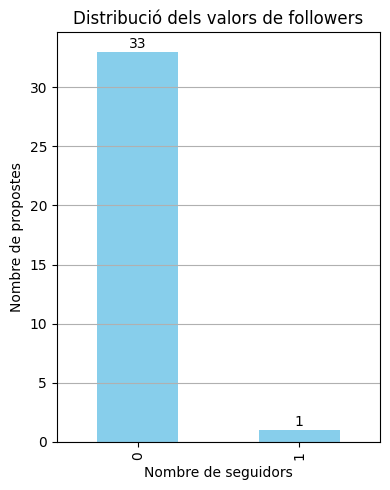

In [306]:
valors = df_proposals['followers'].value_counts().sort_index()

plt.figure(figsize=(4, 5))
valors.plot(kind='bar', color='skyblue')
plt.xlabel("Nombre de seguidors")
plt.ylabel("Nombre de propostes")
plt.title("Distribució dels valors de followers")

for i, v in enumerate(valors):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Com s'observa clarament veient el gràfic de la distribució de valors, només hi ha una proposta amb 1 seguidor, mentre que tota la resta no en té cap.

### Published_at

<class 'str'>
Primera proposta en data: 2023-02-09 11:14:25+00:00
Última proposta en data: 2023-02-10 13:02:16+00:00


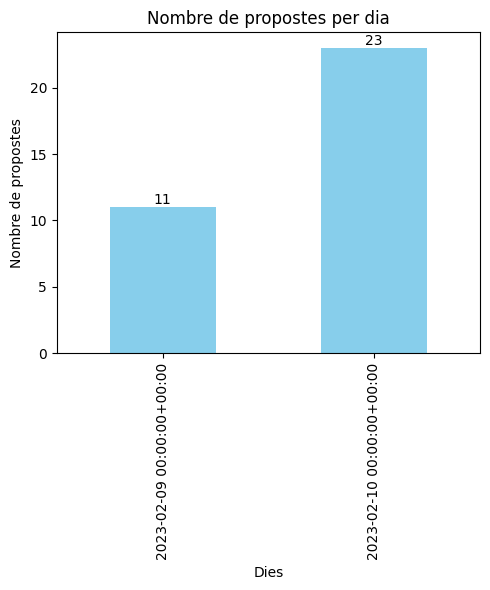

In [307]:
print(type(df_proposals['published_at'][0]))
df_proposals['published_at'] = pd.to_datetime(df_proposals['published_at'], utc=True)
print(f"Primera proposta en data: {min(df_proposals['published_at'])}")
print(f"Última proposta en data: {max(df_proposals['published_at'])}")

plt.figure(figsize=(5,6))

ax = df_proposals.resample('D', on='published_at')['id'].count().plot(kind='bar', width=.5, color='skyblue')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Dies')
plt.ylabel('Nombre de propostes')
plt.title('Nombre de propostes per dia')
plt.tight_layout()
plt.show()

La columna `published_at` conté cadenes de text que representen la data en que es va publicar cada proposta en format UTC. Per poder treballar amb aquestes dades, les hem transformat al valor DateTime de Pandas. Observem que entre la primera data de publicació i la última, hi ha una diferència de poc més d'un dia i que 11 propostes van ser publicades al primer i 23 al segon dia. Això sembla bastant estrany, ja que no és normal que totes les propostes s'hagin publicat en un dia de diferència i que totes les propostes les hagi publicat un mateix usuari oficial. Suposem que això es deu a que les propostes van ser recollides de forma manual als debats presencials i després es van penjar a la pàgina web.

### Url

In [308]:
print(type(df_proposals['url'][0]))
print(df_proposals['url'].nunique())
print(df_proposals['url'].unique())

<class 'str'>
34
['https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38115'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38116'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38117'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38118'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38119'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38120'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38121'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38122'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38123'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38124'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38125'
 'https://www.decidim.barcelona/processes/AssembleaClima/f/5536/proposals/38127'
 'https://w

La columna `url` conté cadenes de text que representen la URL única de cada proposta per poder accedir a ella a través del navegador web. Tal i com s'espera, existeixen tantes URLs diferents com propostes hi ha al dataset.

### Is_amend

In [309]:
print(type(df_proposals['is_amend'][0]))
print(df_proposals['is_amend'].nunique())
print(df_proposals['is_amend'].unique())

<class 'numpy.bool_'>
1
[False]


La columna `is_amend` conté valors booleans que representen si la proposta ha estat editada/modificada després de publicar-la. En aquest cas s'observa que totes les propostes tenen el mateix valor, False, i per tant, cap proposta ha estat editada posteriorment a la seva publicació.

### Title_es

In [310]:
print(type(df_proposals['title/es'][0]))
print(df_proposals['title/es'].nunique())
print(df_proposals['title/es'].unique())
print(len(df_proposals) == df_proposals['title/es'].nunique())

<class 'str'>
34
['Reducir el consumo energético del Ayuntamiento'
 'Facilitar los trámites de la transición energética'
 'Difundir las Comunidades Energéticas a través del tejido asociativo de la ciudad'
 'Crear la normativa necesaria para impulsar las Comunidades Energéticas en Barcelona'
 'Generar cultura y sensiblización en torno a la transición energética'
 'Garantizar un consumo energético mínimo vital y desincentivar el consumo excesivo'
 'Crear un polo de empresas dedicadas a la reducción del consumo energético y la transición ecológica'
 'Sustituir y reciclar los electrodomésticos poco eficientes cuando finalice su vida útil'
 'Garantizar el reciclaje de las instalaciones de energía renovable y monitorizar sus impactos'
 'Regular el precio del alquiler según la eficiencia energética de la vivienda'
 'Impulsar el uso de vehículos compartidos'
 'Crear intercambiadores y buses lanzadera en las entradas de Barcelona'
 'Crear una aplicación que coordine la movilidad sostenible'
 'C

La columna `title/es` conté cadenes de text que representen el títol en castellà de cada proposta. En aquest cas, i tal com s'ha vist a la columna `title/ca`, existeixen tants títols diferents com propostes hi ha, cosa que fa treure dubtes de que existeixin propostes duplicades.

### Body/es

In [311]:
print(type(df_proposals['body/es'][0]))
print(df_proposals['body/es'].nunique())
print(df_proposals['body/es'].unique())
print(len(df_proposals) == df_proposals['body/es'].nunique())

<class 'str'>
34
['Descripción:\nEjecutar una batería de medidas que sitúen al Ayuntamiento como\nun ejemplo a seguir en reducción del consumo energético. Los\ncambios pasan por la reducción del consumo en equipamientos\npúblicos como las escuelas, la sensibilización a trabajadores/as\ny usuarios/as, la generación de energía en edificios y espacios\npúblicos y las mejoras de eficiencia.\n\nJustificación:\nEl Ayuntamiento tiene margen para actuar en los edificios y\nespacios públicos que gestiona. También es un referente para la\nciudadanía, y sus decisiones tienen mayor visibilidad. Por todo\nello, las mejoras en el funcionamiento de la institución tienen\nun impacto positivo como motor de cambio. Además, las mejoras\ntecnológicas permiten reducir el consumo sin perder calidad de\nvida.\n\nAcciones:\n\n* Repensar la iluminación de la ciudad para hacerla más\neficiente. Cambiar bombillas, revisar que la vegetación no cree\nespacios oscuros y dejar de iluminar espacios que no sean\nneces

La columna `body/es` conté cadenes de text que representen el contingut de cada proposta en castellà. Tal i com s'ha vist a la columna `body/ca`, existeix un contingut diferent per a cada proposta, cosa que fa treure dubtes de que existeixin propostes duplicades també. De la mateixa manera que a la columna `body/ca`, el contingut està dividit en seccións com 'Descripción', 'Justificación' i 'Acciones'. Val a dir que com es veu, a la última proposta en comptes de 'Descripción', s'hi veu 'Descripció', com si s'haguessin oblidat d'escriure la "n" final. També està en format HTML i segurament caldrà tractar els textos més endavant per treure els tags HTML.

## Eliminació de columnes innecessàries

In [312]:
df_proposals.head(3)

,id,category/id,category/name/ca,category/name/es,scope/id,scope/name/ca,scope/name/es,participatory_space/id,participatory_space/url,component/id,...,supports,endorsements/total_count,comments,attachments,followers,published_at,url,is_amend,title/es,body/es
0,38115,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:14:25+00:00,https://www.decidim.barcelona/processes/Assemb...,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...
1,38116,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:30:49+00:00,https://www.decidim.barcelona/processes/Assemb...,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...
2,38117,1460,Energia,Energía,11,Ciutat,Ciutat,204,https://www.decidim.barcelona/processes/Assemb...,5536,...,0,0,0,0,0,2023-02-09 11:49:38+00:00,https://www.decidim.barcelona/processes/Assemb...,False,Difundir las Comunidades Energéticas a través ...,Descripción:\nDar a conocer las comunidades en...


Com s'ha vist durant l'anàlisi dels atributs, hi ha moltes columnes que no són necessàries a l'hora de realitzar un anàlisi de correlacions o un modelatge de les dades. Així doncs procedim a eliminar-ne les innecessàries.

In [313]:
df_proposals = df_proposals.drop(columns=['category/id', 'scope/id', 'scope/name/ca', 'scope/name/es', 'participatory_space/id', 'participatory_space/url', 'component/id', 'reference', 'url'])
print(len(df_proposals.columns))
df_proposals.head(3)

17


,id,category/name/ca,category/name/es,title/ca,body/ca,state,answer/ca,answer/es,supports,endorsements/total_count,comments,attachments,followers,published_at,is_amend,title/es,body/es
0,38115,Energia,Energía,Reduir el consum energètic de l'Ajuntament,Descripció:\nExecutar una bateria de mesures q...,accepted,<p>Aquesta proposta és viable i està alineada ...,<p>Esta propuesta es viable y está alineada co...,0,0,0,0,0,2023-02-09 11:14:25+00:00,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...
1,38116,Energia,Energía,Facilitar els tràmits de la transició energètica,Descripció:\nCrear un únic punt administratiu ...,accepted,<p>Aquesta proposta és viable i està alineada ...,<p>Esta propuesta es viable y está alineada co...,0,0,0,0,0,2023-02-09 11:30:49+00:00,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...
2,38117,Energia,Energía,Difondre les Comunitats Energètiques a través ...,Descripció:\nDonar a conèixer les comunitats e...,accepted,<p>Aquesta proposta és viable i està alineada ...,<p>Esta propuesta es viable y está alineada co...,0,0,0,0,0,2023-02-09 11:49:38+00:00,False,Difundir las Comunidades Energéticas a través ...,Descripción:\nDar a conocer las comunidades en...


En aquest cas, hem reduït el nombre de columnes a 17. Guardem tant la traducció en català com en castellà, per poder fer proves tant en castellà com en català i veure quin idioma pot proporcionar millors resulats a l'hora de fer el modelatge. També, tot i que les columnes com supports, endorsements, etc... només contenen zeros, les deixem per seguir el mateix patró que amb les dades de l'Assemblea Ciutadana pel Clima de Catalunya. Tot i que també s'ha observat que no té gaire sentit fixar-se en la data de publicació, també hem optat per deixar-la ja que sempre està bé saber quan es van publicar les dades.

## Tractament de les columnes

Hem observat durant l'anàlisi dels atributs que les columnes `answer/ca` i `answer/es`, que contenen la resposta oficial de l'ajuntament a les propostes, estan formatejades en format HTML, per tant caldria extreure'n els tags HTML si es vol tractar de qualsevol manera el text posteriorment.

In [314]:
def remove_html_tags(row):
    result = re.sub('<.*?>', '', row)
    return result

df_proposals['answer/ca'] = df_proposals['answer/ca'].apply(lambda cw : remove_html_tags(cw))
df_proposals['answer/es'] = df_proposals['answer/es'].apply(lambda cw : remove_html_tags(cw))
df_proposals.head(2)

,id,category/name/ca,category/name/es,title/ca,body/ca,state,answer/ca,answer/es,supports,endorsements/total_count,comments,attachments,followers,published_at,is_amend,title/es,body/es
0,38115,Energia,Energía,Reduir el consum energètic de l'Ajuntament,Descripció:\nExecutar una bateria de mesures q...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,0,0,0,2023-02-09 11:14:25+00:00,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...
1,38116,Energia,Energía,Facilitar els tràmits de la transició energètica,Descripció:\nCrear un únic punt administratiu ...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,0,0,0,2023-02-09 11:30:49+00:00,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...


També hem vist que el cos de la proposta conté tres parts diferents, la 'Descripció', que presenta la proposta, la 'Justificació', que justifica el perquè d'aquesta proposta i finalment les 'Accions' que són les accions necessàries per dur a terme la proposta. Tal i com s'ha comentat abans, potser seria interessant separar aquests tres apartats en columnes diferents per poder tractar millor el text.

In [315]:
def get_descripcio_ca(row):
    inici_desc = row.find('Descripció:')
    final_desc = row.find('Justificació:', inici_desc)
    descripcio = row[inici_desc:final_desc]
    return descripcio.strip('Descripció:')


def get_justificacio_ca(row):
    inici_desc = row.find('Justificació:')
    final_desc = row.find('Accions:', inici_desc)
    descripcio = row[inici_desc:final_desc]
    return descripcio.strip('Justificació:')


def get_accions_ca(row):
    inici_desc = row.find('Accions:')
    descripcio = row[inici_desc:]
    return descripcio.strip('Accions:')

df_proposals['description/ca'] = df_proposals['body/ca'].apply(lambda cw: get_descripcio_ca(cw))
df_proposals['justification/ca'] = df_proposals['body/ca'].apply(lambda cw: get_justificacio_ca(cw))
df_proposals['actions/ca'] = df_proposals['body/ca'].apply(lambda cw: get_accions_ca(cw))
df_proposals.head(2)

,id,category/name/ca,category/name/es,title/ca,body/ca,state,answer/ca,answer/es,supports,endorsements/total_count,comments,attachments,followers,published_at,is_amend,title/es,body/es,description/ca,justification/ca,actions/ca
0,38115,Energia,Energía,Reduir el consum energètic de l'Ajuntament,Descripció:\nExecutar una bateria de mesures q...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,0,0,0,2023-02-09 11:14:25+00:00,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...,\nExecutar una bateria de mesures que situïn l...,\nL'Ajuntament té marge per actuar en els edif...,\n\n* Repensar la il·luminació de la ciutat pe...
1,38116,Energia,Energía,Facilitar els tràmits de la transició energètica,Descripció:\nCrear un únic punt administratiu ...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,0,0,0,2023-02-09 11:30:49+00:00,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...,\nCrear un únic punt administratiu per gestion...,\nFacilitar els tràmits administratius pot imp...,\n\n* Crear una finestreta única de cara a la ...


In [316]:
def get_descripcio_es(row):
    if row.find('Descripción:') != -1:
        inici_desc = row.find('Descripción:')
        mal_escrit = False
    else:
        inici_desc = row.find('Descripció:')
        mal_escrit = True
    final_desc = row.find('Justificación:', inici_desc)
    descripcio = row[inici_desc:final_desc]
    if mal_escrit:
        return descripcio.strip('Descripció:')
    else:
        return descripcio.strip('Descripción:')


def get_justificacio_es(row):
    inici_desc = row.find('Justificación:')
    final_desc = row.find('Acciones:', inici_desc)
    descripcio = row[inici_desc:final_desc]
    return descripcio.strip('Justificación:')


def get_accions_es(row):
    inici_desc = row.find('Acciones:')
    descripcio = row[inici_desc:]
    return descripcio.strip('Acciones:')

df_proposals['description/es'] = df_proposals['body/es'].apply(lambda cw: get_descripcio_es(cw))
df_proposals['justification/es'] = df_proposals['body/es'].apply(lambda cw: get_justificacio_es(cw))
df_proposals['actions/es'] = df_proposals['body/es'].apply(lambda cw: get_accions_es(cw))
print(f"Nombre de columnes actuals post tractament: {len(df_proposals.columns)}")
df_proposals.head(2)

Nombre de columnes actuals post tractament: 23


,id,category/name/ca,category/name/es,title/ca,body/ca,state,answer/ca,answer/es,supports,endorsements/total_count,...,published_at,is_amend,title/es,body/es,description/ca,justification/ca,actions/ca,description/es,justification/es,actions/es
0,38115,Energia,Energía,Reduir el consum energètic de l'Ajuntament,Descripció:\nExecutar una bateria de mesures q...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,...,2023-02-09 11:14:25+00:00,False,Reducir el consumo energético del Ayuntamiento,Descripción:\nEjecutar una batería de medidas ...,\nExecutar una bateria de mesures que situïn l...,\nL'Ajuntament té marge per actuar en els edif...,\n\n* Repensar la il·luminació de la ciutat pe...,\nEjecutar una batería de medidas que sitúen a...,\nEl Ayuntamiento tiene margen para actuar en ...,\n\n* Repensar la iluminación de la ciudad par...
1,38116,Energia,Energía,Facilitar els tràmits de la transició energètica,Descripció:\nCrear un únic punt administratiu ...,accepted,Aquesta proposta és viable i està alineada amb...,Esta propuesta es viable y está alineada con a...,0,0,...,2023-02-09 11:30:49+00:00,False,Facilitar los trámites de la transición energé...,Descripción:\nCrear un único punto administrat...,\nCrear un únic punt administratiu per gestion...,\nFacilitar els tràmits administratius pot imp...,\n\n* Crear una finestreta única de cara a la ...,\nCrear un único punto administrativo para ges...,\nFacilitar los trámites administrativos puede...,\n\n* Crear una ventanilla única de cara a la ...
